# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [53]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [54]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*(numpy.sin(x))

Ensure your function works with numpy arrays:

In [55]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [56]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x)*(numpy.sin(x))-((x**2)-2)*(numpy.cos(x))-2

Check your solution with the same numpy array:

In [57]:
assert g(0) == 0.

In [58]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [59]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [60]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [61]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    delta = ((xmax - xmin)/(2*N))
    x = delta + xmin
    even = 0.0
    for i in range (1, N+1):
        even += 4*f(x)
        x += 2*delta
    
    x = xmin + 2*delta
    odd = 0.0
    for i in range (1, N):
        odd += 2*f(x)
        x += 2*delta
        
    return (delta/3)*(f(xmin) + f(xmax) + odd + even)

Make sure you have implemented Simpson's rule correctly:

In [62]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [63]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


[0.9998411017590972, 0.9999902084218212, 0.9999993901821506, 0.9999999619199721, 0.9999999976205225, 0.9999999998512907, 0.999999999990706, 0.9999999999994182, 0.9999999999999637]


Text(0.5,1,'The ratio of the numerical integral to the analytical integral of x^2sin(x) using various numbers of panels')

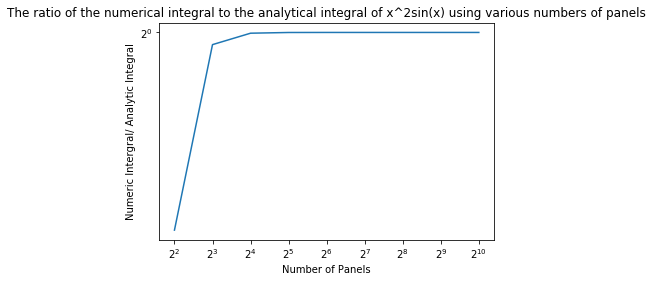

In [64]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
n1 = integrate_numeric(x0, x1, 4)
n2 = integrate_numeric(x0, x1, 8)
n3 = integrate_numeric(x0, x1, 16)
n4 = integrate_numeric(x0, x1, 32)
n5 = integrate_numeric(x0, x1, 64)
n6 = integrate_numeric(x0, x1, 128)
n7 = integrate_numeric(x0, x1, 256)
n8 = integrate_numeric(x0, x1, 512)
n9 = integrate_numeric(x0, x1, 1024)
yvalues = [n1/result_analytic, n2/result_analytic, n3/result_analytic, n4/result_analytic, n5/result_analytic, n6/result_analytic, n7/result_analytic, n8/result_analytic, n9/result_analytic]
print (yvalues)
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
plt.plot (panel_counts, yvalues)
plt.xlabel('Number of Panels')
plt.ylabel('Numeric Intergral/ Analytic Integral')
plt.title('The ratio of the numerical integral to the analytical integral of x^2sin(x) using various numbers of panels')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels used for the numerical method increases, the accuracy of the result generally increases, scaling as N^-4. This is shown by the fractional difference between the two methods approaching one as the number of panels increases. This is because when there are more panels they each approximate a smaller amount of the curve, so there is less room for variation of the gradient of the curve within the width of the panel. For a very high number of panels there are numerical rounding errors which arise from the rounding of the computer when handling numbers with many decimal places. Beyond this point the accuracy doesn't improve and it will vary randomly. There are also other limitations for the use of Simpson's rule. If the function being integrated in't smooth then using higher numbers of panels will not necessarily lead to a better aproximation of the integral. Also if the function is not a high order then using a very large number of panels will not lead to a better approximation.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Using the trapesium rule, a larger panel count also generally increases the accuracy of the approximation, scaling as N^-2. Using the trapesium rule the increase in accuracy is smooth for higher panel counts than it is for Simpson's rule, although it will also eventually stop increasing in accuracy due to the numerical rounding errors of the computer. Generally the trapesium rule is not as accurate as Simpson's rule for approximating the integral, although it may work better for linear functions. 